## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### import the csv data

In [2]:
df=pd.read_csv('data/stud.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### preparing x and y variables

In [3]:
x=df.drop(columns=['math_score'],axis=1)

x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y=df['math_score']

y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [5]:
# check no. of categpries in each categorical column:
print('categories in "gender" variable:  ',end="")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())

categories in "gender" variable:  ['female' 'male']
categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:    ['none' 'completed']


### Create Column Transformer: with 3-types of transformers. 

In [6]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [7]:
x=preprocessor.fit_transform(x)

In [9]:
x.shape

(1000, 19)

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape

((700, 19), (300, 19))

In [11]:
## create Evaluate Funcation to give all metrics after model training:

def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)

    return mae,rmse,r2_square

# Model Training

In [13]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'K-NeighborsRegressor':KNeighborsRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'AdaBoostRegressor':AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]

    # Training model
    model.fit(x_train,y_train)

    # Make Predictions:
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Evaluate Train and Test dataset:
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    #Model performance for Training set
    print("Model performance for Training set")

    
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    # Model performance for test set
    print('Model performance for Test set')

    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')



LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.2483
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5576
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


K-NeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.6784
- Mean Absolute Error: 4.5037
- R2 Score: 0.8538
-------------------------

# Results

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score'])

,Model_Name,R2_Score
0,LinearRegression,0.875863
1,Ridge,0.875907
2,Lasso,0.810281
3,K-NeighborsRegressor,0.772328
4,Decision Tree Regressor,0.720792
5,Random Forest,0.849932
6,XGBRegressor,0.811816
7,CatBoostRegressor,0.852108
8,AdaBoostRegressor,0.835559


In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.875907
0,LinearRegression,0.875863
7,CatBoostRegressor,0.852108
5,Random Forest,0.849932
8,AdaBoostRegressor,0.835559
6,XGBRegressor,0.811816
2,Lasso,0.810281
3,K-NeighborsRegressor,0.772328
4,Decision Tree Regressor,0.720792


# Linear Regression

In [34]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)

y_pred=lin_model.predict(x_test)

score=r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.88


### Plot Y_pred and Y_test

Text(0, 0.5, 'Predicted')

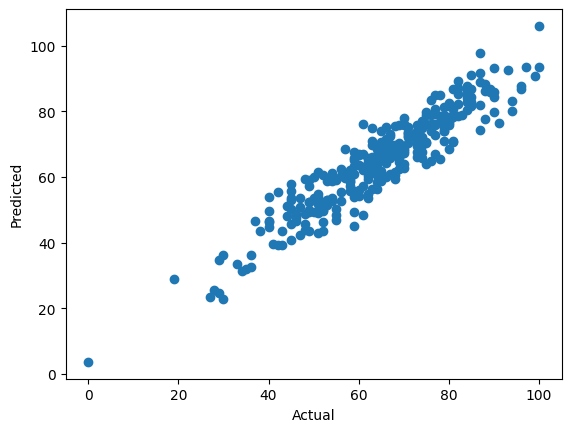

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')


### Regression plot

<Axes: xlabel='math_score'>

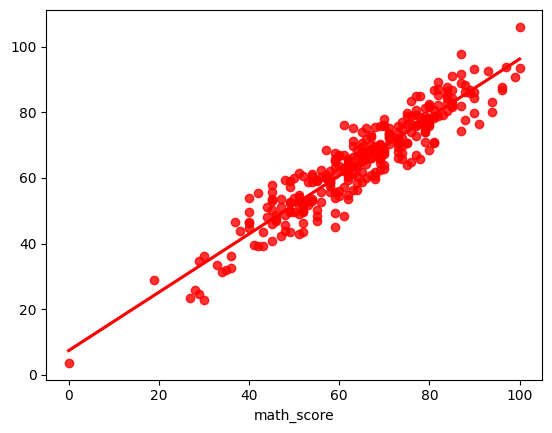

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='r')

### Difference between Actual and Predicted Value:

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test - y_pred})

pred_df.head()

,Actual Value,Predicted Value,Difference
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
